# Exercici Recuperació 2. Bessó digital Poppy Ergo JR - TIC TAC TOE

## 0. Crear un Jupyter notebooks, configurar una connexió amb l'escena Coppelia i fer moure tots els motors del robot.

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sim
from sympy import *
import time

In [23]:
# Establish the connection
def connect(port):
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Connect
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Don't forget to add a lua child script to the first joint and append the "simRemoteApi.start(19999)" line to the sysCall_init() function.
clientID = connect(19999)

conectado a 19999


In [24]:
def getControllers():
    # Require the handlers for the motors and the camera sensor
    retCode,sensorHandle=sim.simxGetObjectHandle(clientID,'Vision_sensor',sim.simx_opmode_blocking)
    retCode,m1=sim.simxGetObjectHandle(clientID,'m1',sim.simx_opmode_blocking)
    retCode,m2=sim.simxGetObjectHandle(clientID,'m2',sim.simx_opmode_blocking)
    retCode,m3=sim.simxGetObjectHandle(clientID,'m3',sim.simx_opmode_blocking)
    retCode,m4=sim.simxGetObjectHandle(clientID,'m4',sim.simx_opmode_blocking)
    retCode,m5=sim.simxGetObjectHandle(clientID,'m5',sim.simx_opmode_blocking)
    retCode,m6=sim.simxGetObjectHandle(clientID,'m6',sim.simx_opmode_blocking)
    retCode,redC1=sim.simxGetObjectHandle(clientID,'CuboRed1',sim.simx_opmode_blocking)
    retCode,redC2=sim.simxGetObjectHandle(clientID,'CuboRed2',sim.simx_opmode_blocking)
    retCode,redC3=sim.simxGetObjectHandle(clientID,'CuboRed3',sim.simx_opmode_blocking)
    retCode,claw=sim.simxGetObjectHandle(clientID,'holder_visual',sim.simx_opmode_blocking)

    return sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw

sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()

print(sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw)

36 16 18 20 22 24 26 0 0 0 28


In [25]:
def get_robot_position():
    # Read position, in radians
    retCode, qr0 = sim.simxGetJointPosition(clientID, m1, sim.simx_opmode_blocking)
    retCode, qr1 = sim.simxGetJointPosition(clientID, m2, sim.simx_opmode_blocking)
    retCode, qr2 = sim.simxGetJointPosition(clientID, m3, sim.simx_opmode_blocking)
    retCode, qr3 = sim.simxGetJointPosition(clientID, m4, sim.simx_opmode_blocking)
    retCode, qr4 = sim.simxGetJointPosition(clientID, m5, sim.simx_opmode_blocking)
    retCode, qr5 = sim.simxGetJointPosition(clientID, m6, sim.simx_opmode_blocking)
    # Show position, in degrees
    q0 = qr0 * 180/np.pi
    q1 = qr1 * 180/np.pi
    q2 = qr2 * 180/np.pi
    q3 = qr3 * 180/np.pi
    q4 = qr4 * 180/np.pi
    q5 = qr5 * 180/np.pi
    print("Position of the robot in degrees: ")
    print(f"  m1: {q0}\n  m2: {q1}\n  m3: {q2}\n  m4: {q3}\n  m5: {q4}\n  m6: {q5}")

get_robot_position()

Position of the robot in degrees: 
  m1: 0.1927730313188317
  m2: -0.12152879550988319
  m3: 0.0
  m4: 179.9835032719216
  m5: 109.99771039419747
  m6: 19.99999941818584


In [26]:
def reset_motors():
    # Send the positions to the motors
    q = [0, 0, 0, 180 * np.pi/180, 110 * np.pi/180, 20 * np.pi/180]
    retCode = sim.simxSetJointTargetPosition(clientID, m1, q[0], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m2, q[1], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m3, q[2], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m4, q[3], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m5, q[4], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m6, q[5], sim.simx_opmode_oneshot)
    time.sleep(1)
reset_motors()

def open_claw(cuboid):
        retCode = sim.simxSetObjectIntParameter(clientID, cuboid, sim.sim_shapeintparam_static, 0, sim.simx_opmode_blocking)
        retCode = sim.simxSetJointTargetPosition(clientID, m6, -20 * np.pi/180, sim.simx_opmode_oneshot)
        retCode = sim.simxSetObjectParent(clientID, cuboid, -1, False, sim.simx_opmode_blocking)

def close_claw(cuboid):
    retCode = sim.simxSetObjectIntParameter(clientID, cuboid, sim.sim_shapeintparam_static, 1, sim.simx_opmode_blocking)
    retCode = sim.simxSetObjectParent(clientID, cuboid, claw, True, sim.simx_opmode_blocking)
    retCode = sim.simxSetJointTargetPosition(clientID, m6, 20 * np.pi/180, sim.simx_opmode_oneshot)

## 1. Dur a terme el processament d'imatges per identificar la forma i el color dels cubs. Pots moure les fitxes al coppelia al tauler quan està en martxa.

## Reviseu l'exercici 9 per talde realitzar aquesta part.

In [27]:
# Obtain an image from the Camera Sensor
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
len(image)

196608

In [12]:
resolution

[256, 256]

In [13]:
# It is an image with a resolution of 256*256 and each pixel is RGB
256*256*3

196608

C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -70 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -74 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -83 to uint8 will fail in the future.
For 

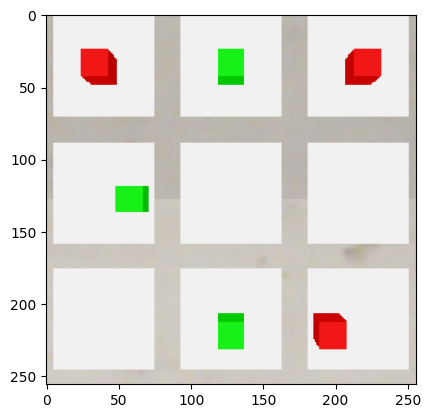

In [29]:
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

In [30]:
# Define color ranges in RGB

# green_low = np.array([0, 100, 0], dtype=np.uint8)
# green_high = np.array([5, 195, 5], dtype=np.uint8)

green_low = np.array([0, 50, 0], dtype=np.uint8)
green_high = np.array([100, 255, 100], dtype=np.uint8)

# red_low = np.array([150, 0, 0], dtype=np.uint8)
# red_high = np.array([195, 5, 5], dtype=np.uint8)

red_low = np.array([40, 0, 0])
red_high = np.array([255, 70, 70])

In [31]:
# Thresholding
green_mask = cv2.inRange(img, green_low, green_high)
red_mask = cv2.inRange(img, red_low, red_high)

In [32]:
# Erase image noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)
green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

In [33]:
# Get contours and positions
red_pixels = cv2.bitwise_and(img, img, mask=red_mask)
green_pixels = cv2.bitwise_and(img, img, mask=green_mask)


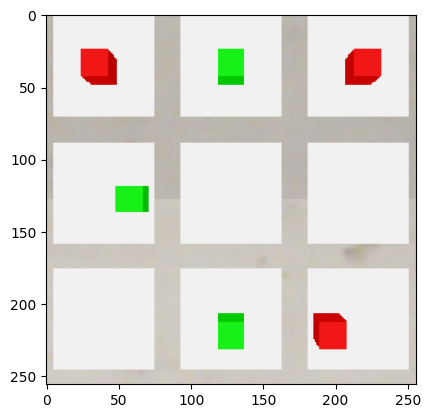

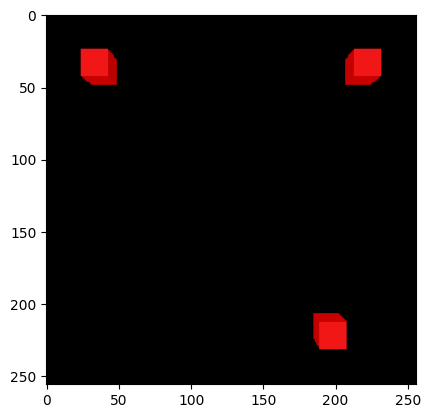

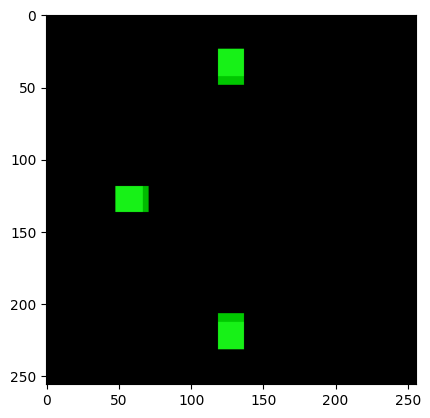

In [34]:
# Show image with contours
plt.imshow(img)
plt.show()
plt.imshow(red_pixels)
plt.show()
plt.imshow(green_pixels)
plt.show()

## 2. Determinar les posicions aproximades (tant en l'eix X com en l'eix Y).

## Coloqueu els cubs sobre el tauler. Heu de fer mesures i aplicar una regla de conversió per saber quines son les posicions reals dels cubs

In [35]:

def get_block_coordinates(image):
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Umbralizar la imagen en escala de grises para obtener una imagen binaria
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    
    # Encontrar contornos en la imagen binaria
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Lista para almacenar las coordenadas de los bloques
    block_coordinates = []
    
    # Iterar sobre todos los contornos encontrados
    for contour in contours:
        # Obtener el rectángulo delimitador de cada contorno
        x, y, w, h = cv2.boundingRect(contour)
        
        # Agregar las coordenadas del rectángulo delimitador a la lista de coordenadas de bloques
        block_coordinates.append(((x, y), (x + w, y + h)))
    
    return block_coordinates

red_block_coordinates = get_block_coordinates(red_pixels)
green_block_coordinates = get_block_coordinates(green_pixels)

def obtener_coordenadas_bloques(coordenadas):
    lista_coordenadas = []
    if coordenadas:
        for block_coord in coordenadas:
            ((x1, y1), (x2, y2)) = block_coord
            x1 = round(x1 / 100)
            y1 = round(y1 / 100)
            y1 = (2 - y1) % 3 # invertimos verticalmente
            # x2 = round(x2 / 100) # no usamos borde inferior derecho porque no deberia ser necesario
            # y2 = round(y2 / 100)
            lista_coordenadas.append((x1, y1))
    return lista_coordenadas

# Obtener coordenadas de los bloques rojos
coordenadas_rojos = obtener_coordenadas_bloques(red_block_coordinates)

# Obtener coordenadas de los bloques verdes
coordenadas_verdes = obtener_coordenadas_bloques(green_block_coordinates)



# Imprimir las coordenadas
print("Coordenadas de los bloques rojos:")
for coordenadas in coordenadas_rojos:
    print(coordenadas)

print("\nCoordenadas de los bloques verdes:")
for coordenadas in coordenadas_verdes:
    print(coordenadas)




Coordenadas de los bloques rojos:
(2, 0)
(2, 2)
(0, 2)

Coordenadas de los bloques verdes:
(1, 0)
(0, 1)
(1, 2)


In [46]:

# print("Green position in the scene: ", green_x, ", ", green_y)
# print("Red position in the scene: ", red_x, ", ", red_y)


## 3. Realitzar cinemàtica inversa per poder arribar als cubs vermells i recollir-los i col·locar-los al tauler.
## Podeu aprofitar el codi que teniu a continuació que permet aproparse a la posició x, y i z geomètricament.

In [36]:
import math

def ik(destination):
    # Cinemàtica Inversa d un robot antropomorfic 3 eixos
    
    # Posición (x,y,z)
    # Coordenadas Destino
    x = destination[0];
    y = destination[1];
    z = destination[2];
    
    b=0.15; #longitud de brazo L1 + extensió fins al dummy
    ab=0.05; #longitud de antebrazo L2
    H=0.05; #altura de base
    
    
    Axis1=math.atan2(y,x);
    xprima=math.sqrt(math.pow(x,2)+math.pow(y,2));
    yprima=z;
    B=xprima;
    A=z-H;
    
    Hip=math.sqrt(math.pow(A,2)+math.pow(B,2));
    alfa=math.atan2(A,B);
    beta=math.acos((math.pow(b,2)-math.pow(ab,2)+math.pow(Hip,2))/(2*b*Hip));
    
    Axis2=alfa+beta;
    
    gamma=math.acos((math.pow(b,2)+math.pow(ab,2)-math.pow(Hip,2))/(2*b*ab));
    
    Axis3=gamma;
    
    Axis1Grados=Axis1*180/math.pi; #Giro base Grados
    Axis2Grados=90-Axis2*180/math.pi; #Giro brazo Grados
    Axis3Grados=180-Axis3*180/math.pi; #Giro antebrazo Grados
    
    print("    theta1 =",Axis1Grados,"º");
    print("    theta2 =",Axis2Grados,"º");
    print("    theta3 =",Axis3Grados,"º");

    return [Axis1Grados*np.pi/180,Axis2Grados*np.pi/180,Axis3Grados*np.pi/180,0,110*np.pi/180,0]

def move(q):
    retCode = sim.simxSetJointTargetPosition(clientID, m1, q[0], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m2, q[1], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m3, q[2], sim.simx_opmode_oneshot)


    time.sleep(1)

def geometric_resolution(p):
    try:
        q = ik(p)
        move(q)
    except:
        print('No solution')
        q=[0,0,0,0,0,0]
    return q

In [39]:
cliendID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()

# Go for red cube
#aprofiteu les funions per tal d'arribar a cada una de les posicions
# el robot juga amb vermelles
p = [0, -0.175, 0.01]
print("Destination:")
print("    x:",p[0])
print("    y:",p[1])
print("    z:",p[2],"\n")

print("IK:")
q = geometric_resolution(p)
close_claw(redC1)
time.sleep(1)

# Let red cube
q = geometric_resolution([0.14, 0, 0.12])

time.sleep(1)
open_claw(redC1)

time.sleep(1)
reset_motors()

conectado a 19999
Destination:
    x: 0
    y: -0.175
    z: 0.01 

IK:
    theta1 = -90.0 º
    theta2 = 88.74682742325525 º
    theta3 = 61.20568867371158 º
    theta1 = 0.0 º
    theta2 = 44.816723689804235 º
    theta3 = 91.91021317170993 º


In [45]:
userID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()

reset_motors()
time.sleep(1)

q = geometric_resolution([0.3, 0, 0.1])
time.sleep(1)

reset_motors()

conectado a 19999
No solution


## 4. Realitzeu el codi per jugar al TicTacToe contra el robot, el Robot ha de jugar amb vermelles i tú pot jugar amb les altres. Pot començar el Robot posant la primera 

In [54]:
def getState():
    # Obtain an image from the Camera Sensor
    retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
    img=np.array(image,dtype=np.uint8)
    img.resize([resolution[1],resolution[0],3])
    # plt.imshow(img)
    # plt.show()

    # Define color ranges in RGB
    green_low = np.array([0, 50, 0], dtype=np.uint8)
    green_high = np.array([100, 255, 100], dtype=np.uint8)

    red_low = np.array([40, 0, 0])
    red_high = np.array([255, 70, 70])

    # Thresholding
    green_mask = cv2.inRange(img, green_low, green_high)
    red_mask = cv2.inRange(img, red_low, red_high)

    # Erase image noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

    # Get contours and positions
    red_pixels = cv2.bitwise_and(img, img, mask=red_mask)
    green_pixels = cv2.bitwise_and(img, img, mask=green_mask)

    # plt.imshow(img)
    # plt.show()
    # plt.imshow(red_pixels)
    # plt.show()
    # plt.imshow(green_pixels)
    # plt.show()

    red_block_coordinates = get_block_coordinates(red_pixels)
    green_block_coordinates = get_block_coordinates(green_pixels)

    # Obtener coordenadas de los bloques en el tablero 3x3
    coordenadas_rojos = obtener_coordenadas_bloques(red_block_coordinates)
    coordenadas_verdes = obtener_coordenadas_bloques(green_block_coordinates)

    return coordenadas_rojos, coordenadas_verdes

In [53]:
def generateMatrix(coordenadas):
    # Inicializar la matriz de 3x3 con ceros
    matriz = [[0 for _ in range(3)] for _ in range(3)]
    
    # Marcar las posiciones especificadas con un 1
    for x, y in coordenadas:
        if 0 <= x < 3 and 0 <= y < 3:  # Verificar que las coordenadas estén dentro del rango válido
            matriz[y][x] = 1
    
    return matriz

In [67]:
def translateCoords(destination):
    x_des, y_des = destination

    x_correlations = {
        0: 0.3,
        1: 0.2,
        3: 0.1
    }

    y_correlations = {
        0: -0.1,
        1: 0,
        3: 0.1
    }

    x = x_correlations.get(x_des, None)
    y = y_correlations.get(y_des, None)   
    z = 0.01  
    
    return [x, y, z]
    
redBlocksDict = [(redC1, [0.1, -0.175, 0.01]), (redC2, [0.05, -0.175, 0.01]), (redC3, [0, -0.175, 0.01])]
def getAvailableRedBlock():
    if redBlocksDict:
        return redBlocksDict.pop()

def moveBlock(destination):
    p = translateCoords(destination)

    print("p: ", p)

    print("IK:")
    (block, coords) = getAvailableRedBlock()
    if(block, coords):
        open_claw(block)
        time.sleep(2)
        print("Block coords: ", coords)
        geometric_resolution(coords)
        time.sleep(2)
        close_claw(block)
        time.sleep(1)
        # Let red cube
        geometric_resolution(p)

        time.sleep(1)
        open_claw(block)

        time.sleep(1)

    reset_motors()

In [48]:
def compruebaGanador(matriz):
    # Comprobar filas
    for fila in matriz:
        if fila == [1, 1, 1]:
            return True
    
    # Comprobar columnas
    for col in range(3):
        if matriz[0][col] == matriz[1][col] == matriz[2][col] == 1:
            return True
    
    # Comprobar diagonales
    if matriz[0][0] == matriz[1][1] == matriz[2][2] == 1:
        return True
    if matriz[0][2] == matriz[1][1] == matriz[2][0] == 1:
        return True
    
    # Si no hay ganador
    return False

def compruebaGanadorMixedMatrix(matrix, player):
    # Comprobar filas
    for row in matrix:
        if row == [player, player, player]:
            return True
    # Comprobar columnas
    for col in range(3):
        if matrix[0][col] == matrix[1][col] == matrix[2][col] == player:
            return True
    # Comprobar diagonales
    if matrix[0][0] == matrix[1][1] == matrix[2][2] == player:
        return True
    if matrix[0][2] == matrix[1][1] == matrix[2][0] == player:
        return True
    return False

# Crear una matriz combinada
def combineMatrix(userMatrix, robotMatrix):
    combinedMatrix = [[0 for _ in range(3)] for _ in range(3)]
    for i in range(3):
        for j in range(3):
            if userMatrix[i][j] == 1:
                combinedMatrix[i][j] = 1
            elif robotMatrix[i][j] == 1:
                combinedMatrix[i][j] = 2
    return combinedMatrix

# Función para encontrar posibles movimientos
def find_possible_moves(matrix):
    moves = []
    for i in range(3):
        for j in range(3):
            if matrix[i][j] == 0:
                moves.append((i, j))
    return moves

def defineNewPosition(userMatrix, robotMatrix):
    combinedMatrix = combineMatrix(userMatrix, robotMatrix)
    # Intentar ganar en la siguiente jugada
    possible_moves = find_possible_moves(combinedMatrix)
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 2
        if compruebaGanadorMixedMatrix(combinedMatrix, 2):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Bloquear al usuario si está a punto de ganar
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 1
        if compruebaGanadorMixedMatrix(combinedMatrix, 1):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Elegir el centro si está libre
    if combinedMatrix[1][1] == 0:
        return (1, 1)

    # Tomar una esquina si está libre
    for move in [(0, 0), (0, 2), (2, 0), (2, 2)]:
        if combinedMatrix[move[0]][move[1]] == 0:
            return move

    # Tomar cualquier otro movimiento disponible
    return possible_moves[0]

def detectNewMove(previousMatrix, matrix):
    for i in range(3):
        for j in range(3):
            if previousMatrix[i][j] == 0 and matrix[i][j] == 1:
                return (i, j)
    return None

def waitForManualMove(newPlannedPosition, previousPlannedPosition, previousRobotMatrix):
    robotMove = False

    while(robotMove == False):
        time.sleep(5)
        coordenadas_rojos, coordenadas_verdes = getState()
        # print("coordenadas_rojos: ", coordenadas_rojos)
        robotMatrix = generateMatrix(coordenadas_rojos)                

        # print("Matriz robot:")
        # for fila in robotMatrix:
        #     print(fila)

        previousPosition, newPosition = detectNewMove(previousRobotMatrix, robotMatrix)

        if newPosition: # Se ha detectado un movimiento
            if previousPlannedPosition:  # Tiene que ser desde un bloque colocado
                if (newPosition == newPlannedPosition and previousPlannedPosition == previousPosition): # Todo OK
                    print("Movimiento correctamente detectado de ", previousPosition, " a ", newPosition)
                    robotMove = True
                else: # Algo ha salido mal
                    if previousPlannedPosition != previousPosition: # Bloque previo mal 
                        print("Movimiento erroneo (previousPlannedPosition: ", previousPlannedPosition, ", pero previousPosition: ", previousPosition, ")")
                    if newPlannedPosition != newPosition: # Bloque nuevo mal
                        print("Movimiento erroneo (newPlannedPosition: ", newPlannedPosition, ", pero newPosition: ", newPosition, ")")
            else:  # Nuevo movimiento desde fuera
                if newPosition == newPlannedPosition:
                    print("Movimiento correctamente detectado en ", newPosition)
                    robotMove = True
                else:
                    print("Movimiento erroneo (newPlannedPosition: ", newPlannedPosition, ", pero newPosition: ", newPosition, ")")
        # else: # NO se ha detectado un movimiento
            # if previousPlannedPosition: # Tiene que mover un bloque colocado
            #     print("El robot no pudo mover el bloque. Por favor, muevalo de ", previousPlannedPosition, " a ", newPlannedPosition)
            # else:
            #     print("El robot no pudo mover el bloque. Por favor, posicionelo en la posición ", newPlannedPosition)
    return robotMatrix

In [76]:
# Versión del tic tac toe con 3 turnos por jugador

def ticTacToeGame():
    previousUserMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    previousRobotMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    turno = 0
    end = False

    print("Starting game")

    while(end == False and turno <= 6-2): # 9 - 2 porque en la propia iteración se suman dos turnos.
        turno = turno + 1 
        print("------------------Turno ", turno ,": Robot------------------")
        #1: Mover bloque
        robotMove = False

        newPosition = defineNewPosition(previousUserMatrix, previousRobotMatrix)
        print("[Robot] newPosition: ", newPosition)

        moveBlock(newPosition)
        time.sleep(1)

        print("Block moved, checking...")

        coordenadas_rojos, coordenadas_verdes = getState()
        # print("coordenadas_rojos: ", coordenadas_rojos)
        robotMatrix = generateMatrix(coordenadas_rojos)

        move = detectNewMove(previousRobotMatrix, robotMatrix)

        if(move):
            print("Movimiento del Robot detectado en ", move)
            previousRobotMatrix = robotMatrix
            robotMove = True
        else:
            print("El robot no pudo mover el bloque. Por favor, posicionelo en la posición ", newPosition)

        ###################
        # THIS SOULD NOT BE NEEDED
        while(robotMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_rojos: ", coordenadas_rojos)
            robotMatrix = generateMatrix(coordenadas_rojos)                

            move = detectNewMove(previousRobotMatrix, robotMatrix)

            if(move):
                print("Movimiento del Robot detectado en ", move)
                if(move != newPosition):
                    print("Por favor, no ponga el bloque en ", move, ", muévalo a ", newPosition)
                else:
                    previousRobotMatrix = robotMatrix
                    robotMove = True
        ###################
        print("Bloque correctamente posicionado en ", newPosition)
        print("Matriz robot:")
        for fila in robotMatrix:
            print(fila)

        if(turno >= 5):
            if(compruebaGanador(robotMatrix)):
                end = True
                winner = "Robot"
                break

        # print("Matriz robot:")
        # for fila in robotMatrix:
        #     print(fila)

        #2: Esperar a que usuario mueva ficha
        turno = turno + 1
        print("------------------Turno ", turno ,": Usuario------------------")

        userMove = False

        while(userMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_verdes: ", coordenadas_verdes)
            userMatrix = generateMatrix(coordenadas_verdes)                

            move = detectNewMove(previousUserMatrix, userMatrix)

            if(move):
                print("Movimiento del Usuario detectado en ", move)
                print("Matriz usuario:")
                for fila in userMatrix:
                    print(fila)
                previousUserMatrix = userMatrix
                userMove = True

        if(turno >= 5):
            if(compruebaGanador(userMatrix)):
                end = True
                winner = "User"
                break

    if(end):
        print(winner, " wins!")
    else:
        print("No one wins... GG")

In [80]:
userID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()
redBlocksDict = [(redC1, [0.1, -0.175, 0.01]), (redC2, [0.05, -0.175, 0.01]), (redC3, [0, -0.175, 0.01])]

ticTacToeGame()

conectado a 19999
Starting game
------------------Turno  1 : Robot------------------
[Robot] newPosition:  (1, 1)
p:  [0.2, 0, 0.01]
IK:
Block coords:  [0, -0.175, 0.01]
    theta1 = -90.0 º
    theta2 = 88.74682742325525 º
    theta3 = 61.20568867371158 º
No solution
Block moved, checking...


C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -70 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -74 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\reyul\AppData\Local\Temp\ipykernel_15788\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -83 to uint8 will fail in the future.
F

Movimiento del Robot detectado en  (1, 1)
Bloque correctamente posicionado en  (1, 1)
Matriz robot:
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]
------------------Turno  2 : Usuario------------------
Movimiento del Usuario detectado en  (0, 0)
Matriz usuario:
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
------------------Turno  3 : Robot------------------
[Robot] newPosition:  (0, 2)
p:  [0.3, None, 0.01]
IK:
Block coords:  [0.05, -0.175, 0.01]
    theta1 = -74.05460409907715 º
    theta2 = 90.60756432635621 º
    theta3 = 49.583940102410594 º
No solution
Block moved, checking...
Movimiento del Robot detectado en  (0, 2)
Bloque correctamente posicionado en  (0, 2)
Matriz robot:
[0, 0, 1]
[0, 1, 0]
[0, 0, 0]
------------------Turno  4 : Usuario------------------
Movimiento del Usuario detectado en  (0, 1)
Matriz usuario:
[1, 1, 0]
[0, 0, 0]
[0, 0, 0]
------------------Turno  5 : Robot------------------
[Robot] newPosition:  (2, 0)
p:  [None, -0.1, 0.01]
IK:
Block coords:  [0.1, -0.175, 0.01]
No solution
No solution


## Aqui te dejo funciones y bucles del juego que he ido haciendo, pero no entran en lo que se pedía del problema. Por si te interesa :)

In [68]:
userID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()
redBlocksDict = [(redC1, [0.1, -0.175, 0.01]), (redC2, [0.05, -0.175, 0.01]), (redC3, [0, -0.175, 0.01])]

previousUserMatrix = [[0,0,0],[0,0,0],[0,0,0]]
previousRobotMatrix = [[0,0,0],[0,0,0],[0,0,0]]

newPosition = defineNewPosition(previousUserMatrix, previousRobotMatrix)
print("[Robot] newPosition: ", newPosition)

moveBlock(newPosition)
time.sleep(1)

conectado a 19999
[Robot] newPosition:  (1, 1)
p:  [0.2, 0, 0.01]
IK:
Block coords:  [0, -0.175, 0.01]
    theta1 = -90.0 º
    theta2 = 88.74682742325525 º
    theta3 = 61.20568867371158 º
No solution


In [228]:
userID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()

# Go for red cube
#aprofiteu les funions per tal d'arribar a cada una de les posicions
# el robot juga amb vermelles

# p = [0.1, -0.165, 0.01] # C1
# cubo = redC1

p = [-0.05, -0.175, 0.01] # C2 ok
cubo = redC2

# p = [0.1, -0.165, 0.02] # C3
# cubo = redC3

# p = [0, -0.175, 0.01]

# open_claw(cubo)

# print("IK:")
# q = geometric_resolution(p)
# time.sleep(1)
# close_claw(cubo)
# time.sleep(2)

q = geometric_resolution([0.1873, 0, 0.1])
# time.sleep(1)
# reset_motors()

# q = geometric_resolution([0.1874, 0, 0.12])
# time.sleep(1)

# reset_motors()

conectado a 19999
    theta1 = 0.0 º
    theta2 = 66.98002046609636 º
    theta3 = 32.99136224911234 º


In [160]:
userID = connect(19999)
sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw = getControllers()

cubo = redC3

# Go for red cube
#aprofiteu les funions per tal d'arribar a cada una de les posicions
# el robot juga amb vermelles
p = [0, -0.175, 0.01]
print("Destination:")
print("    x:",p[0])
print("    y:",p[1])
print("    z:",p[2],"\n")

print("IK:")
q = geometric_resolution(p)
close_claw(cubo)
time.sleep(1)

# Let red cube
q = geometric_resolution([0.14, 0, 0.12])

time.sleep(1)
open_claw(cubo)

time.sleep(1)
reset_motors()

conectado a 19999
Destination:
    x: 0
    y: -0.175
    z: 0.01 

IK:
    theta1 = -90.0 º
    theta2 = 88.74682742325525 º
    theta3 = 61.20568867371158 º
No solution


In [57]:
def old_defineNewPosition(userMatrix, robotMatrix):
    combinedMatrix = combineMatrix(userMatrix, robotMatrix)
    possible_moves = find_possible_moves(combinedMatrix)
    
    # Lista de bloques del robot
    robot_blocks = [(i, j) for i in range(3) for j in range(3) if robotMatrix[i][j] == 1]
    
    # Si el robot ya tiene 3 bloques, necesitamos mover uno
    if len(robot_blocks) == 3:
        # Intentar ganar en la siguiente jugada
        for move in possible_moves:
            for block in robot_blocks:
                combinedMatrix[block[0]][block[1]] = 0
                combinedMatrix[move[0]][move[1]] = 2
                if compruebaGanadorMixedMatrix(combinedMatrix, 2):
                    return move, block
                combinedMatrix[block[0]][block[1]] = 2
                combinedMatrix[move[0]][move[1]] = 0

        # Bloquear al usuario si está a punto de ganar
        for move in possible_moves:
            for block in robot_blocks:
                combinedMatrix[block[0]][block[1]] = 0
                combinedMatrix[move[0]][move[1]] = 1
                if compruebaGanadorMixedMatrix(combinedMatrix, 1):
                    return move, block
                combinedMatrix[block[0]][block[1]] = 2
                combinedMatrix[move[0]][move[1]] = 0

        # Elegir el centro si está libre
        if combinedMatrix[1][1] == 0:
            return (1, 1), robot_blocks[0]

        # Tomar una esquina si está libre
        for move in [(0, 0), (0, 2), (2, 0), (2, 2)]:
            if combinedMatrix[move[0]][move[1]] == 0:
                return move, robot_blocks[0]

        # Tomar cualquier otro movimiento disponible
        return possible_moves[0], robot_blocks[0]
    else:
        # Intentar ganar en la siguiente jugada
        for move in possible_moves:
            combinedMatrix[move[0]][move[1]] = 2
            if compruebaGanadorMixedMatrix(combinedMatrix, 2):
                return move, None
            combinedMatrix[move[0]][move[1]] = 0

        # Bloquear al usuario si está a punto de ganar
        for move in possible_moves:
            combinedMatrix[move[0]][move[1]] = 1
            if compruebaGanadorMixedMatrix(combinedMatrix, 1):
                return move, None
            combinedMatrix[move[0]][move[1]] = 0

        # Elegir el centro si está libre
        if combinedMatrix[1][1] == 0:
            return (1, 1), None

        # Tomar una esquina si está libre
        for move in [(0, 0), (0, 2), (2, 0), (2, 2)]:
            if combinedMatrix[move[0]][move[1]] == 0:
                return move, None

        # Tomar cualquier otro movimiento disponible
        return possible_moves[0], None

redBlocks = [[0.1, -0.175, 0.01], [0.05, -0.175, 0.01], [0, -0.175, 0.01]]
def old_getAvailableRedBlock():
    if redBlocks:
        return redBlocks.pop()
    
def old_moveBlock(destination, oldPosition=None):
    p = translateCoords(destination)

    open_claw(redC1)
    time.sleep(2)

    print("IK:")
    if(oldPosition):
        q = translateCoords(oldPosition)
    else:
        q = geometric_resolution(getAvailableRedBlock())

    time.sleep(2)
    close_claw(redC1)
    time.sleep(1)
    # Let red cube
    q = geometric_resolution(p)

    time.sleep(1)
    open_claw(redC1)

    time.sleep(1)
    reset_motors()

def old_detectNewMove(previousMatrix, matrix):
    previousPosition = False
    newPosition = False

    for i in range(3):
        for j in range(3):
            if previousMatrix[i][j] == 1 and matrix[i][j] == 0:
                previousPosition = (i, j)
            elif previousMatrix[i][j] == 0 and matrix[i][j] == 1:
                newPosition = (i, j)
    
    if newPosition:
        return previousPosition, newPosition
    return False, False

def infiniteTicTacToeGame():
    previousUserMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    previousRobotMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    turno = 0

    print("Starting game")

    while(True): # Bucle hasta que alguien gane
        turno = turno + 1 
        print("------------------Turno ", turno ,": Robot------------------")
        #1: Mover bloque
        robotMove = False

        newPlannedPosition, previousPlannedPosition = defineNewPosition(previousUserMatrix, previousRobotMatrix)
        if(previousPlannedPosition):
            print("[Robot] previousPlannedPosition: ", previousPlannedPosition, ", newPlannedPosition: ", newPlannedPosition)
        else:
            print("[Robot] newPlannedPosition: ", newPlannedPosition)

        # moveBlock(newPlannedPosition, previousPlannedPosition)
        # time.sleep(1)

        print("Block moved, checking...")

        coordenadas_rojos, coordenadas_verdes = getState()
        # print("coordenadas_rojos: ", coordenadas_rojos)
        robotMatrix = generateMatrix(coordenadas_rojos)

        previousPosition, newPosition = detectNewMove(previousRobotMatrix, robotMatrix)

        if newPosition: # Se ha detectado un movimiento
            if previousPlannedPosition:  # Tiene que ser desde un bloque colocado
                if (newPosition == newPlannedPosition and previousPlannedPosition == previousPosition): # Todo OK
                    print("Movimiento del Robot detectado de ", previousPosition, " a ", newPosition, " correctamente")
                    previousRobotMatrix = robotMatrix
                    robotMove = True
                else: # Algo ha salido mal
                    if previousPlannedPosition != previousPosition: # Bloque previo mal 
                        print("Movimiento del Robot fallido (previousPlannedPosition: ", previousPlannedPosition, ", pero previousPosition: ", previousPosition, ")")
                    if newPlannedPosition != newPosition: # Bloque nuevo mal
                        print("Movimiento del Robot fallido (newPlannedPosition: ", newPlannedPosition, ", pero newPosition: ", newPosition, ")")
            else:  # Nuevo movimiento desde fuera
                if newPosition == newPlannedPosition:
                    print("Movimiento del Robot detectado en ", newPosition)
                    previousRobotMatrix = robotMatrix
                    robotMove = True
                else:
                    print("Movimiento del Robot fallido (newPlannedPosition: ", newPlannedPosition, ", pero newPosition: ", newPosition, ")")
        else: # NO se ha detectado un movimiento
            if previousPlannedPosition: # Tiene que mover un bloque colocado
                print("El robot no pudo mover el bloque. Por favor, muevalo de ", previousPlannedPosition, " a ", newPlannedPosition)
            else:
                print("El robot no pudo mover el bloque. Por favor, posicionelo en la posición ", newPlannedPosition)

        ###################
        # THIS SOULD NOT BE NEEDED
        if(robotMove == False):
            robotMatrix = waitForManualMove(newPlannedPosition, previousPlannedPosition, previousRobotMatrix)
            previousRobotMatrix = robotMatrix
        ###################

        print("Matriz robot:")
        for fila in robotMatrix:
            print(fila)

        if(turno >= 5):
            if(compruebaGanador(robotMatrix)):
                winner = "Robot"
                break

        #2: Esperar a que usuario mueva ficha
        turno = turno + 1
        print("------------------Turno ", turno ,": Usuario------------------")

        userMove = False

        while(userMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_verdes: ", coordenadas_verdes)
            userMatrix = generateMatrix(coordenadas_verdes)                

            previousPosition, newPosition = detectNewMove(previousUserMatrix, userMatrix)

            if(newPosition):
                if(previousPosition):
                    print("Movimiento del Usuario detectado de ", previousPosition, " a ", newPosition)
                else:
                    print("Movimiento del Usuario detectado en ", move)

                print("Matriz usuario:")
                for fila in userMatrix:
                    print(fila)

                previousUserMatrix = userMatrix
                userMove = True

        if(turno >= 5):
            if(compruebaGanador(userMatrix)):
                winner = "User"
                break

    print(winner, " wins!")

In [58]:
userID = connect(19999)

# infiniteTicTacToeGame()

conectado a 19999


In [59]:
def old_defineNewPosition(userMatrix, robotMatrix):
    combinedMatrix = combineMatrix(userMatrix, robotMatrix)
    # Intentar ganar en la siguiente jugada
    possible_moves = find_possible_moves(combinedMatrix)
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 2
        if compruebaGanadorMixedMatrix(combinedMatrix, 2):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Bloquear al usuario si está a punto de ganar
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 1
        if compruebaGanadorMixedMatrix(combinedMatrix, 1):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Elegir el centro si está libre
    if combinedMatrix[1][1] == 0:
        return (1, 1)

    # Tomar una esquina si está libre
    for move in [(0, 0), (0, 2), (2, 0), (2, 2)]:
        if combinedMatrix[move[0]][move[1]] == 0:
            return move

    # Tomar cualquier otro movimiento disponible
    return possible_moves[0]

def old_detectNewMove(previousMatrix, matrix):
    for i in range(3):
        for j in range(3):
            if previousMatrix[i][j] == 0 and matrix[i][j] == 1:
                return (i, j)
    return None

# En esta versión no he tenido en cuenta 3 bloques de cada, sino más pensando en el tipico 3 en ralla. Lo dejo como añadido.

def tres_en_ralla_game():
    previousUserMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    previousRobotMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    turno = 0
    end = False

    print("Starting game")

    while(end == False and turno <= 9-2): # 9 - 2 porque en la propia iteración se suman dos turnos.
        turno = turno + 1 
        print("------------------Turno ", turno ,": Robot------------------")
        #1: Mover bloque
        robotMove = False

        newPosition = defineNewPosition(previousUserMatrix, previousRobotMatrix)
        print("[Robot] newPosition: ", newPosition)

        # moveBlock(newPosition, None)
        # time.sleep(1)

        print("Block moved, checking...")

        coordenadas_rojos, coordenadas_verdes = getState()
        # print("coordenadas_rojos: ", coordenadas_rojos)
        robotMatrix = generateMatrix(coordenadas_rojos)

        move = detectNewMove(previousRobotMatrix, robotMatrix)

        if(move):
            print("Movimiento del Robot detectado en ", move)
            previousRobotMatrix = robotMatrix
            robotMove = True
        else:
            print("El robot no pudo mover el bloque. Por favor, posicionelo en la posición ", newPosition)

        ###################
        # THIS SOULD NOT BE NEEDED
        while(robotMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_rojos: ", coordenadas_rojos)
            robotMatrix = generateMatrix(coordenadas_rojos)                

            move = detectNewMove(previousRobotMatrix, robotMatrix)

            if(move):
                print("Movimiento del Robot detectado en ", move)
                if(move != newPosition):
                    print("Por favor, no ponga el bloque en ", move, ", muévalo a ", newPosition)
                else:
                    previousRobotMatrix = robotMatrix
                    robotMove = True
        ###################
        print("Bloque correctamente posicionado en ", newPosition)
        print("Matriz robot:")
        for fila in robotMatrix:
            print(fila)

        if(turno >= 5):
            if(compruebaGanador(robotMatrix)):
                end = True
                winner = "Robot"
                break

        # print("Matriz robot:")
        # for fila in robotMatrix:
        #     print(fila)

        #2: Esperar a que usuario mueva ficha
        turno = turno + 1
        print("------------------Turno ", turno ,": Usuario------------------")

        userMove = False

        while(userMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_verdes: ", coordenadas_verdes)
            userMatrix = generateMatrix(coordenadas_verdes)                

            move = detectNewMove(previousUserMatrix, userMatrix)

            if(move):
                print("Movimiento del Usuario detectado en ", move)
                print("Matriz usuario:")
                for fila in userMatrix:
                    print(fila)
                previousUserMatrix = userMatrix
                userMove = True

        if(turno >= 5):
            if(compruebaGanador(userMatrix)):
                end = True
                winner = "User"
                break

    if(end):
        print(winner, " wins!")
    else:
        print("No one wins... GG")

In [60]:
clientID = connect(19999)

# tres_en_ralla_game()

conectado a 19999
